In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import path

We compare the base_case algorithms. C++ uses std::shuffle and my Fisher-Yates. Rust uses Manuel's Fisher-Yates.

In [2]:
# We load data
df_cpp_std = pd.read_csv(path.join("benchmarks", "cpp", "base_case", "20230926-162717-nb=4-th=1073741824-cpp.csv"))
df_cpp_fy = pd.read_csv(path.join("benchmarks", "cpp", "base_case", "20230926-160516-nb=4-th=1073741824-cpp.csv"))
df_rust = pd.read_csv(path.join("benchmarks", "rust", "20230926-135704-nb=4-th=1073741824-r.csv"))
df_cpp_bfy_16 = pd.read_csv(path.join("benchmarks", "cpp", "base_case", "20230927-195905-nb=16-th=1073741824-cpp.csv"))
df_cpp_bfy_32 = pd.read_csv(path.join("benchmarks", "cpp", "base_case", "20230927-201407-nb=16-th=1073741824-cpp.csv"))
df_cpp_bfy_64 = pd.read_csv(path.join("benchmarks", "cpp", "base_case", "20230927-202730-nb=16-th=1073741824-cpp.csv"))
df_cpp_bfy_8 = pd.read_csv(path.join("benchmarks", "cpp", "base_case", "20230927-204053-nb=16-th=1073741824-cpp.csv"))
df_cpp_bfy_16_own_distr = pd.read_csv(path.join("benchmarks", "cpp", "base_case", "20231001-014751-nb=16-th=1073741824-cpp.csv"))
df_cpp_bfy_256_own_distr = pd.read_csv(path.join("benchmarks", "cpp", "base_case", "20231001-215244-nb=16-th=1073741824-cpp.csv"))
df_cpp_bfy_256_own_distr_32 = pd.read_csv(path.join("benchmarks", "cpp", "base_case", "20231011-150446-nb=16-th=1073741824-cpp.csv"))

In [3]:
# Format data
df_cpp_std_mean = df_cpp_std.groupby(["buckets", "threshold", "integers"], as_index=False)[["duration [ns]"]].mean()
df_cpp_fy_mean = df_cpp_fy.groupby(["buckets", "threshold", "integers"], as_index=False)[["duration [ns]"]].mean()
df_rust_mean = df_rust.groupby(["buckets", "threshold", "integers"], as_index=False)[["duration [ns]"]].mean()
df_cpp_bfy_8_mean = df_cpp_bfy_8.groupby(["buckets", "threshold", "integers"], as_index=False)[["duration [ns]"]].mean()
df_cpp_bfy_16_mean = df_cpp_bfy_16.groupby(["buckets", "threshold", "integers"], as_index=False)[["duration [ns]"]].mean()
df_cpp_bfy_32_mean = df_cpp_bfy_32.groupby(["buckets", "threshold", "integers"], as_index=False)[["duration [ns]"]].mean()
df_cpp_bfy_64_mean = df_cpp_bfy_64.groupby(["buckets", "threshold", "integers"], as_index=False)[["duration [ns]"]].mean()
df_cpp_bfy_16_own_distr_mean = df_cpp_bfy_16_own_distr.groupby(["buckets", "threshold", "integers"], as_index=False)[["duration [ns]"]].mean()
df_cpp_bfy_256_own_distr_mean = df_cpp_bfy_256_own_distr.groupby(["buckets", "threshold", "integers"], as_index=False)[["duration [ns]"]].mean()
df_cpp_bfy_256_own_distr_32_mean = df_cpp_bfy_256_own_distr_32.groupby(["buckets", "threshold", "integers"], as_index=False)[["duration [ns]"]].mean()

Text(0, 0.5, 'runtime [ns]')

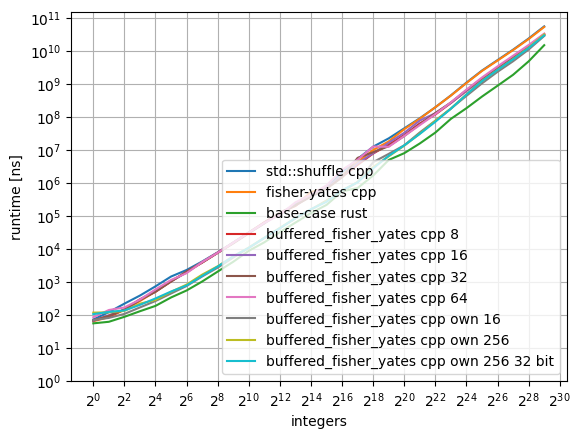

In [4]:
# We plot data
ax_xticks = [2 ** i for i in range(0, 31, 2)]
ax_yticks = [10 ** i for i in range(0, 12, 1)]

ax = df_cpp_std_mean.plot(x="integers", y="duration [ns]", label="std::shuffle cpp")
df_cpp_fy_mean.plot(ax=ax, x="integers", y="duration [ns]", label="fisher-yates cpp")
df_rust_mean.plot(ax=ax, x="integers", y="duration [ns]", label="base-case rust")
df_cpp_bfy_8_mean.plot(ax=ax, x="integers", y="duration [ns]", label="buffered_fisher_yates cpp 8")
df_cpp_bfy_16_mean.plot(ax=ax, x="integers", y="duration [ns]", label="buffered_fisher_yates cpp 16")
df_cpp_bfy_32_mean.plot(ax=ax, x="integers", y="duration [ns]", label="buffered_fisher_yates cpp 32")
df_cpp_bfy_64_mean.plot(ax=ax, x="integers", y="duration [ns]", label="buffered_fisher_yates cpp 64")
df_cpp_bfy_16_own_distr_mean.plot(ax=ax, x="integers", y="duration [ns]", label="buffered_fisher_yates cpp own 16")
df_cpp_bfy_256_own_distr_mean.plot(ax=ax, x="integers", y="duration [ns]", label="buffered_fisher_yates cpp own 256")
df_cpp_bfy_256_own_distr_32_mean.plot(ax=ax, x="integers", y="duration [ns]", label="buffered_fisher_yates cpp own 256 32 bit")

ax.set_xscale("log", base=2)
ax.set_yscale("log", base=10)
ax.set_xticks(ax_xticks)
ax.set_yticks(ax_yticks)
ax.grid(True)
ax.set_xlabel("integers")
ax.set_ylabel("runtime [ns]")

Let's check runtime per integer [ns] again.

In [5]:
df_cpp_std_mean["runtime/integer [ns]"] = df_cpp_std_mean["duration [ns]"] / df_cpp_std_mean["integers"]
df_cpp_fy_mean["runtime/integer [ns]"] = df_cpp_fy_mean["duration [ns]"] / df_cpp_fy_mean["integers"]
df_rust_mean["runtime/integer [ns]"] = df_rust_mean["duration [ns]"] / df_rust_mean["integers"]
df_cpp_bfy_8_mean["runtime/integer [ns]"] = df_cpp_bfy_8_mean["duration [ns]"] / df_cpp_bfy_8_mean["integers"]
df_cpp_bfy_16_mean["runtime/integer [ns]"] = df_cpp_bfy_16_mean["duration [ns]"] / df_cpp_bfy_16_mean["integers"]
df_cpp_bfy_32_mean["runtime/integer [ns]"] = df_cpp_bfy_32_mean["duration [ns]"] / df_cpp_bfy_32_mean["integers"]
df_cpp_bfy_64_mean["runtime/integer [ns]"] = df_cpp_bfy_64_mean["duration [ns]"] / df_cpp_bfy_64_mean["integers"]
df_cpp_bfy_16_own_distr_mean["runtime/integer [ns]"] = df_cpp_bfy_16_own_distr_mean["duration [ns]"] / df_cpp_bfy_16_own_distr_mean["integers"]
df_cpp_bfy_256_own_distr_mean["runtime/integer [ns]"] = df_cpp_bfy_256_own_distr_mean["duration [ns]"] / df_cpp_bfy_256_own_distr_mean["integers"]
df_cpp_bfy_256_own_distr_32_mean["runtime/integer [ns]"] = df_cpp_bfy_256_own_distr_32_mean["duration [ns]"] / df_cpp_bfy_256_own_distr_32_mean["integers"]

Text(0, 0.5, 'runtime/integer [ns]')

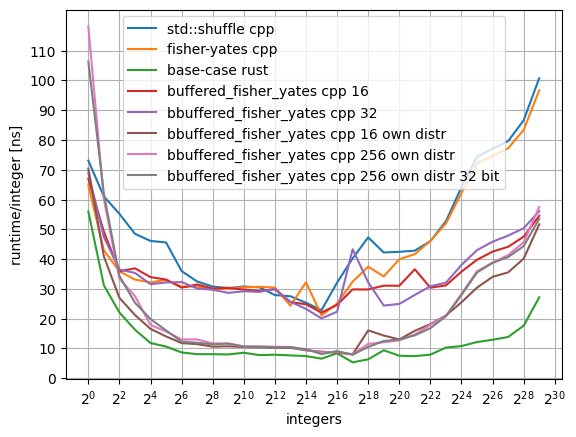

In [6]:
# We plot data
ax_2_xticks = ax_xticks
ax_2_yticks = [10 * i for i in range(0, 12, 1)]

ax_2 = df_cpp_std_mean.plot(x="integers", y="runtime/integer [ns]", label="std::shuffle cpp")
df_cpp_fy_mean.plot(ax=ax_2, x="integers", y="runtime/integer [ns]", label="fisher-yates cpp")
df_rust_mean.plot(ax=ax_2, x="integers", y="runtime/integer [ns]", label="base-case rust")
#df_cpp_bfy_8_mean.plot(ax=ax_2, x="integers", y="runtime/integer [ns]", label="buffered_fisher_yates cpp 8")
df_cpp_bfy_16_mean.plot(ax=ax_2, x="integers", y="runtime/integer [ns]", label="buffered_fisher_yates cpp 16")
df_cpp_bfy_32_mean.plot(ax=ax_2, x="integers", y="runtime/integer [ns]", label="bbuffered_fisher_yates cpp 32")
# df_cpp_bfy_64_mean.plot(ax=ax_2, x="integers", y="runtime/integer [ns]", label="buffered_fisher_yates cpp 64")
df_cpp_bfy_16_own_distr_mean.plot(ax=ax_2, x="integers", y="runtime/integer [ns]", label="bbuffered_fisher_yates cpp 16 own distr")
df_cpp_bfy_256_own_distr_mean.plot(ax=ax_2, x="integers", y="runtime/integer [ns]", label="bbuffered_fisher_yates cpp 256 own distr")
df_cpp_bfy_256_own_distr_32_mean.plot(ax=ax_2, x="integers", y="runtime/integer [ns]", label="bbuffered_fisher_yates cpp 256 own distr 32 bit")

ax_2.set_xscale("log", base=2)
#ax_2.set_yscale("log", base=10)
ax_2.set_xticks(ax_2_xticks)
ax_2.set_yticks(ax_2_yticks)
ax_2.grid(True)
ax_2.set_xlabel("integers")
ax_2.set_ylabel("runtime/integer [ns]")

Let's check the speedup. We will compare my Fisher-Yates implementation with the base-case algorithm for the rust implementation. The rust one also uses a highly efficient version of Fisher-Yates. 

Speedup = code / (hopefully better code)

In [7]:
df_fy_vs_rust_speedup = df_cpp_fy_mean[["integers"]].copy()
df_fy_vs_rust_speedup["runtime fisher-yates"] = df_cpp_fy_mean["duration [ns]"]
df_fy_vs_rust_speedup["runtime base-case"] = df_rust_mean["duration [ns]"]
df_fy_vs_rust_speedup["speedup"] = df_fy_vs_rust_speedup["runtime fisher-yates"] / df_fy_vs_rust_speedup["runtime base-case"]

df_fy_vs_bfy_8_speedup = df_cpp_bfy_8_mean[["integers"]].copy()
df_fy_vs_bfy_8_speedup["runtime fisher-yates"] = df_cpp_fy_mean["duration [ns]"]
df_fy_vs_bfy_8_speedup["runtime buffered-fisher-yates 8"] = df_cpp_bfy_8_mean["duration [ns]"]
df_fy_vs_bfy_8_speedup["speedup"] = df_fy_vs_bfy_8_speedup["runtime fisher-yates"] / df_fy_vs_bfy_8_speedup["runtime buffered-fisher-yates 8"]

df_fy_vs_bfy_16_speedup = df_cpp_bfy_16_mean[["integers"]].copy()
df_fy_vs_bfy_16_speedup["runtime fisher-yates"] = df_cpp_fy_mean["duration [ns]"]
df_fy_vs_bfy_16_speedup["runtime buffered-fisher-yates 16"] = df_cpp_bfy_16_mean["duration [ns]"]
df_fy_vs_bfy_16_speedup["speedup"] = df_fy_vs_bfy_16_speedup["runtime fisher-yates"] / df_fy_vs_bfy_16_speedup["runtime buffered-fisher-yates 16"]

df_cpp_bfy_16_own_distr_speedup = df_cpp_bfy_16_own_distr_mean[["integers"]].copy()
df_cpp_bfy_16_own_distr_speedup["runtime fisher-yates"] = df_cpp_fy_mean["duration [ns]"]
df_cpp_bfy_16_own_distr_speedup["runtime base-case"] = df_rust_mean["duration [ns]"]
df_cpp_bfy_16_own_distr_speedup["runtime buffered-fisher-yates 16 own distr"] = df_cpp_bfy_16_own_distr_mean["duration [ns]"]
df_cpp_bfy_16_own_distr_speedup["speedup"] = df_cpp_bfy_16_own_distr_speedup["runtime fisher-yates"] / df_cpp_bfy_16_own_distr_speedup["runtime buffered-fisher-yates 16 own distr"]
df_cpp_bfy_16_own_distr_speedup["speedup vs rust"] = df_cpp_bfy_16_own_distr_speedup["runtime buffered-fisher-yates 16 own distr"] / df_cpp_bfy_16_own_distr_speedup["runtime base-case"]

df_cpp_bfy_256_own_distr_speedup = df_cpp_bfy_256_own_distr_mean[["integers"]].copy()
df_cpp_bfy_256_own_distr_speedup["runtime fisher-yates"] = df_cpp_fy_mean["duration [ns]"]
df_cpp_bfy_256_own_distr_speedup["runtime base-case"] = df_rust_mean["duration [ns]"]
df_cpp_bfy_256_own_distr_speedup["runtime buffered-fisher-yates 256 own distr"] = df_cpp_bfy_256_own_distr_mean["duration [ns]"]
df_cpp_bfy_256_own_distr_speedup["speedup"] = df_cpp_bfy_256_own_distr_speedup["runtime fisher-yates"] / df_cpp_bfy_256_own_distr_speedup["runtime buffered-fisher-yates 256 own distr"]
df_cpp_bfy_256_own_distr_speedup["speedup vs rust"] = df_cpp_bfy_256_own_distr_speedup["runtime buffered-fisher-yates 256 own distr"] / df_cpp_bfy_256_own_distr_speedup["runtime base-case"]

Text(0, 0.5, 'speedup')

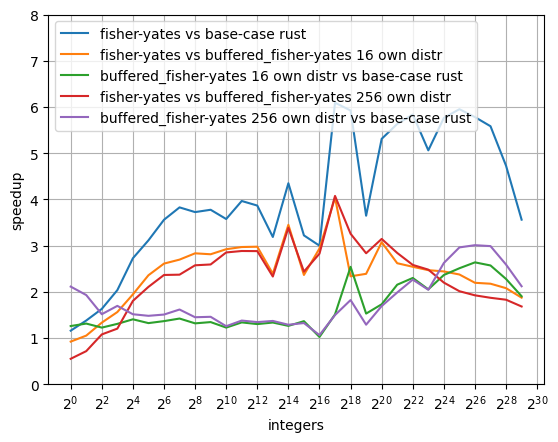

In [12]:
# We plot data
ax_3_xticks = ax_xticks
ax_3_yticks = [1 * i for i in range(0, 9, 1)]

ax_3 = df_fy_vs_rust_speedup.plot(x="integers", y="speedup", label="fisher-yates vs base-case rust")
#df_fy_vs_bfy_8_speedup.plot(ax=ax_3, x="integers", y="speedup", label="buffered_fisher-yates 8 vs fisher-yates")
#df_fy_vs_bfy_16_speedup.plot(ax=ax_3, x="integers", y="speedup", label="buffered_fisher-yates 16 vs fisher-yates")
df_cpp_bfy_16_own_distr_speedup.plot(ax=ax_3, x="integers", y="speedup", label="fisher-yates vs buffered_fisher-yates 16 own distr")
df_cpp_bfy_16_own_distr_speedup.plot(ax=ax_3, x="integers", y="speedup vs rust", label="buffered_fisher-yates 16 own distr vs base-case rust")
df_cpp_bfy_256_own_distr_speedup.plot(ax=ax_3, x="integers", y="speedup", label="fisher-yates vs buffered_fisher-yates 256 own distr")
df_cpp_bfy_256_own_distr_speedup.plot(ax=ax_3, x="integers", y="speedup vs rust", label="buffered_fisher-yates 256 own distr vs base-case rust")

ax_3.set_xscale("log", base=2)
#ax_3.set_yscale("log", base=10)
ax_3.set_xticks(ax_3_xticks)
ax_3.set_yticks(ax_3_yticks)
ax_3.grid(True)
ax_3.set_xlabel("integers")
ax_3.set_ylabel("speedup")